In [2]:
import numpy as np
import scipy
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

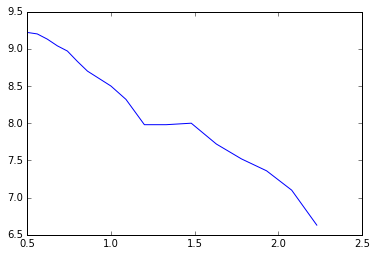

In [5]:
mags = np.array([-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13])
counts = np.array([3.58,4.12,4.71,5.32,5.99,6.61,6.74,7.02,7.34,7.45,7.5,7.54,7.64,7.76,7.84,7.94,8.02,8.05])
masses = np.array([2.23, 2.08, 1.93, 1.78, 1.63, 1.48, 1.33, 1.2, 1.09, 1., .93, .86, .8, .74, .68, .62, .56, .5])
masscounts = np.array([6.63, 7.1, 7.36, 7.52, 7.72, 8., 7.98, 7.98, 8.32, 8.5, 8.6, 8.7, 8.83, 8.97, 9.04, 9.13, 9.2, 9.22])
plt.plot(masses, masscounts)

In [6]:
def salmodel(x):
    model = x[0]*masses+x[1]-masscounts
    return model
final = scipy.optimize.least_squares(salmodel, [7,2.5])

[-1.40350147  9.93839287]


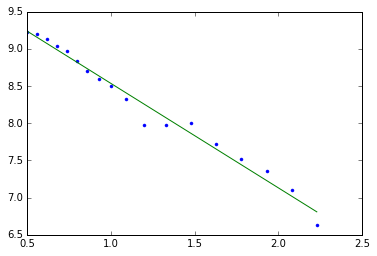

In [7]:
print(final.x)
plt.plot(masses, masscounts, '.')
plt.plot(masses, final.x[0]*masses + final.x[1])


In [16]:
import emcee

def logL(theta, x, y, sigma):
    model = theta[0] * x + theta[1]
    return -0.5*(np.sum((y-model)**2/sigma**(2.) + np.log(2*np.pi*sigma**2)))

ndim, nwalkers = 2, 100
pos = [1e-4*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, logL, args = [masses, masscounts, 1.])
sampler.run_mcmc(pos, 100000)

(array([[ -1.05326372,   9.61878534],
        [ -1.32922418,   9.67316881],
        [ -1.67234528,  10.40334701],
        [ -1.28657188,  10.05338892],
        [ -1.53763558,   9.8640305 ],
        [ -1.50959697,   9.8373517 ],
        [ -1.54037809,   9.68367907],
        [ -1.99192333,  10.89314839],
        [ -2.07503962,  10.95152569],
        [ -0.77265315,   9.66200479],
        [ -1.03215867,   9.88546313],
        [ -0.97796944,   9.29184625],
        [ -1.5757046 ,  10.41867169],
        [ -1.31226101,   9.95017678],
        [ -1.72018172,   9.97443366],
        [ -1.53621778,  10.08815377],
        [ -0.94791747,   9.58018769],
        [ -1.33879794,   9.76931931],
        [ -1.10945656,   9.62165794],
        [ -0.99834493,   9.30852538],
        [ -1.21759684,   9.76423847],
        [ -1.50106961,   9.91943985],
        [ -1.46533333,  10.1136788 ],
        [ -0.97787926,   9.20991376],
        [ -2.27718066,  10.89803021],
        [ -1.64072393,  10.82953368],
        [ -0

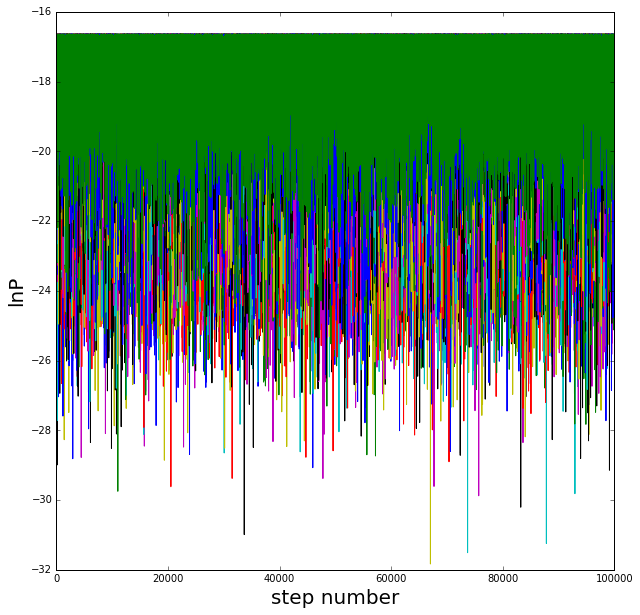

In [26]:
plt.figure(figsize = (10,10))
[plt.plot(sampler.lnprobability[i,100:]) for i in range(100)]
plt.xlabel('step number', fontsize = 20)
plt.ylabel('lnP', fontsize = 20)



alpha_mean = -1.40338977442
alpha_std = 0.44236607741
offset_mean = 9.93833836152
offset_std = 0.577378967269


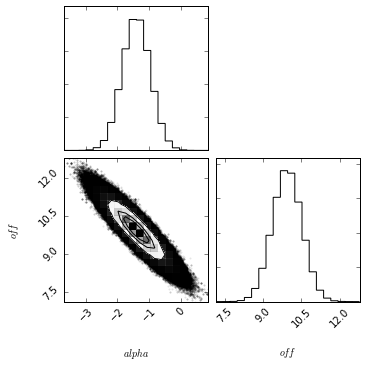

In [30]:
import corner

samples = sampler.chain[:,100:, :].reshape((-1, ndim))
corner.corner(samples, labels=['$alpha$', '$off$'], fontsize = 20)


print('alpha_mean = %s' %(np.mean(samples[:,0])))
print('alpha_std = %s' %(np.std(samples[:,0])))
print('offset_mean = %s' %(np.mean(samples[:,1])))
print('offset_std = %s' %(np.std(samples[:,1])))

There's a surprisingly strong correlation between alpha and the offset value!